<a href="https://www.kaggle.com/code/devikasanthosh04/titanic-logistic-regression-with-python?scriptVersionId=147991441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Reading the Dataset

In [2]:
df =pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Summerizing the Data Set

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Let's see how many people survived
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

# Visualization

<Axes: xlabel='Survived', ylabel='count'>

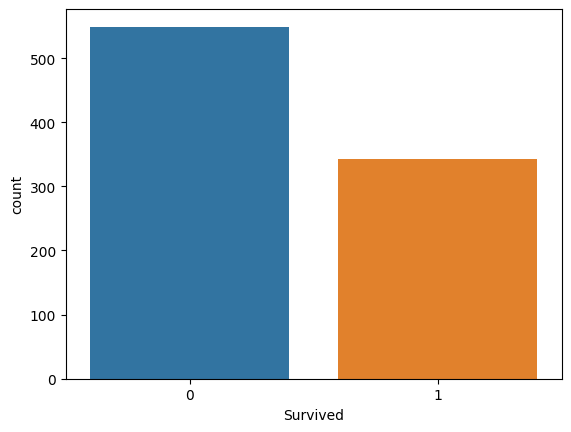

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',data=df)

**-->More people died than survived.**

<Axes: xlabel='Survived', ylabel='count'>

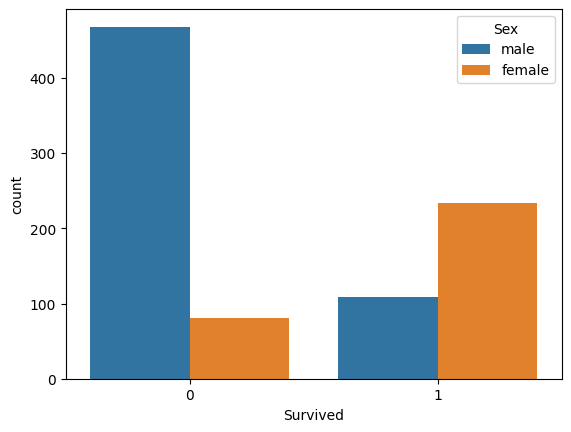

In [7]:
sns.countplot(x='Survived',hue = "Sex",data=df)

**-->More men died than women.**

<Axes: xlabel='Survived', ylabel='count'>

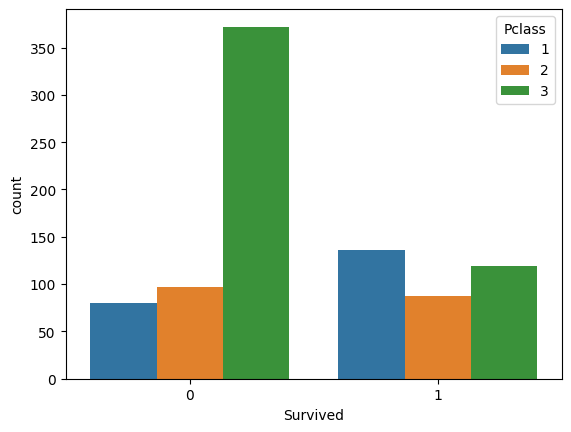

In [8]:
sns.countplot (x ="Survived", hue = "Pclass", data = df)

**-->Most of the died people is from 3rd class than other class.**

<Axes: >

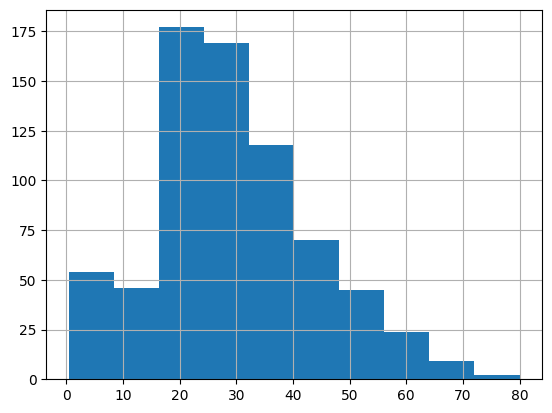

In [9]:
df ["Age"]. hist ()

**-->A Huge number of people are of age 18 to 40.**

<Axes: xlabel='SibSp', ylabel='count'>

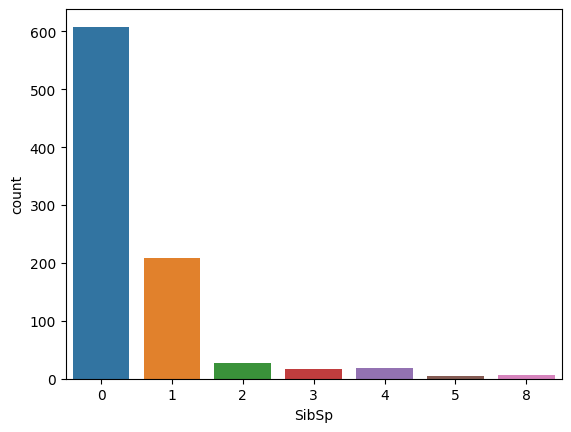

In [10]:
sns.countplot (x ='SibSp', data = df)

<Axes: xlabel='Parch', ylabel='count'>

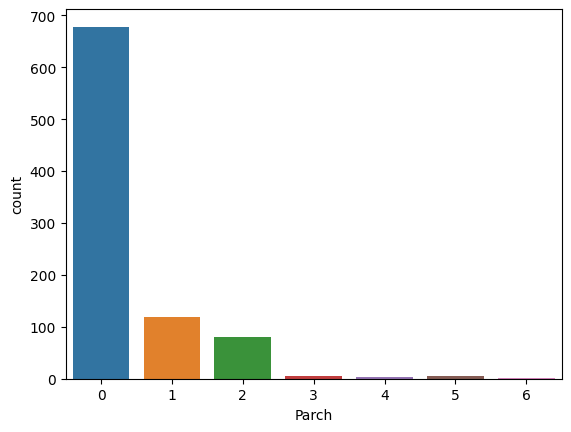

In [11]:
sns.countplot (x ='Parch', data = df)

**-->From the above 2 plots we can infer that most of the passengers were alone or have a minimum of 1 companion with them.**

<Axes: xlabel='Pclass', ylabel='Age'>

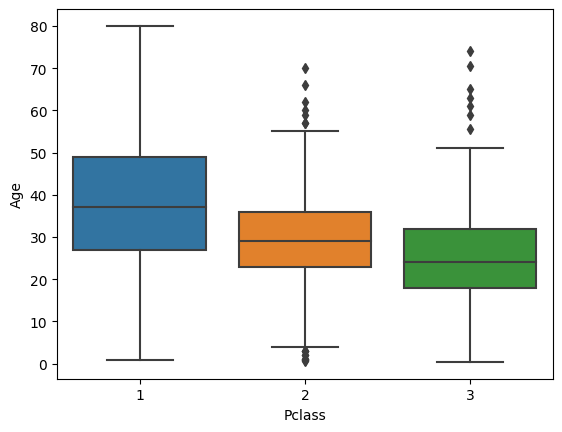

In [12]:
sns.boxplot( x = 'Pclass', y = 'Age', data = df)

**-->1st and 2nd class occupied the elder or aged people.**

<Axes: >

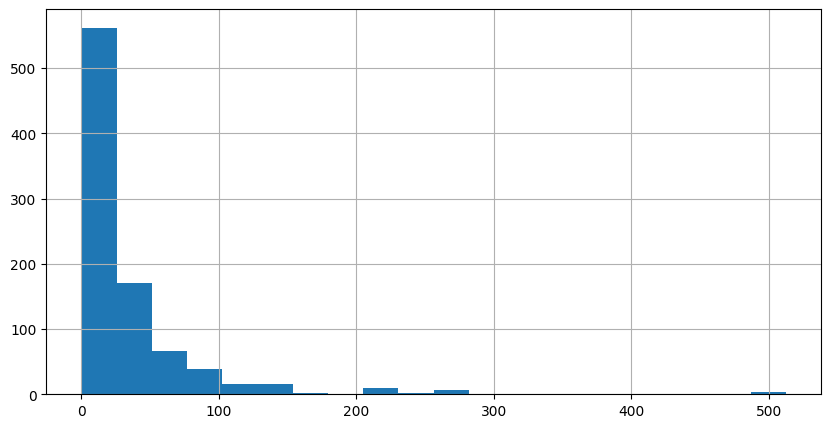

In [13]:
df ["Fare"].hist (bins = 20, figsize = (10,5))

# Cleaning the data

In [14]:
#checking if there is null values
df.isnull().sum ()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here age,cabin,embarked has null values..So we need to replace it.

In [15]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
df['Age'] = pd.cut(df['Age'], bins = bins, labels=labels)

In [16]:
pd.DataFrame(df['Age'].value_counts())

,count
Age,
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [17]:
df['Age'].mode()[0]

'Adult'

In [18]:
df = df.fillna({'Age' : df['Age'].mode()[0]})

Here I am planning to replace the null values with mode value.

We are done with age now let's look at embarked column.

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Our ‘embarked’ columns contains ‘S, C, Q’ and ‘nan’ obviously.

In [20]:
print(f"How many 'S' on embarked column : {df[df['Embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {df[df['Embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {df[df['Embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


Looks like we can use mode of this column to fill nan values.

In [21]:
df = df.fillna({'Embarked' : 'S'})

Since 687 data points of cabin are missing I think its better to drop it.

In [22]:
#Cleaning the data set by removing the unnecessary columns
cleaned_df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

# Cross checking whether we cleaned the data correctly.

In [23]:
cleaned_df.isnull().sum ()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Young,1,0,7.2500,S
1,1,1,female,Adult,1,0,71.2833,C
2,1,3,female,Adult,0,0,7.9250,S
3,1,1,female,Adult,1,0,53.1000,S
4,0,3,male,Adult,0,0,8.0500,S


**To apply logistic regression all the columns should have categorial or numerical values.**

In [25]:
dummies = ['Embarked', 'Sex','Age']
dummy_data = pd.get_dummies(cleaned_df[dummies])

In [26]:
new_df = pd.concat([cleaned_df, dummy_data], axis = 1)
new_df.drop(dummies, axis=1, inplace=True)

In [27]:
new_df.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old
0,0,3,1,0,7.2500,False,False,True,False,True,False,False,True,False,False
1,1,1,1,0,71.2833,True,False,False,True,False,False,False,False,True,False
2,1,3,0,0,7.9250,False,False,True,True,False,False,False,False,True,False
3,1,1,1,0,53.1000,False,False,True,True,False,False,False,False,True,False
4,0,3,0,0,8.0500,False,False,True,False,True,False,False,False,True,False


In [28]:
# Convert multiple columns to uint8 because bool values will throw error.
columns_to_convert = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male','Age_Infant','Age_Kid','Age_Young','Age_Adult','Age_Old']
new_df[columns_to_convert] = new_df[columns_to_convert].astype('uint8')


In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Sex_female  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
 10  Age_Infant  891 non-null    uint8  
 11  Age_Kid     891 non-null    uint8  
 12  Age_Young   891 non-null    uint8  
 13  Age_Adult   891 non-null    uint8  
 14  Age_Old     891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(10)
memory usage: 43.6 KB


# Modeling the DataSet

In [30]:
Y= new_df ['Survived']
X= new_df.drop (['Survived'], axis = 1 )

In [31]:
X.head()

,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old
0,3,1,0,7.2500,0,0,1,0,1,0,0,1,0,0
1,1,1,0,71.2833,1,0,0,1,0,0,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0,0,0,0,1,0
3,1,1,0,53.1000,0,0,1,1,0,0,0,0,1,0
4,3,0,0,8.0500,0,0,1,0,1,0,0,0,1,0


In [32]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train/Test dataset
We split our dataset into train and test set:

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (712, 14) (712,)
Test set: (179, 14) (179,)


# Modeling (Logistic Regression with Scikit-learn)
Let's build our model using LogisticRegression from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now let's fit our model with train set:

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression (solver = 'liblinear')

In [35]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [36]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [37]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

0.785234899328859

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score (Y_test, yhat)

0.8212290502793296

In [39]:
confusion_matrix(yhat, Y_test)

array([[117,  30],
       [  2,  30]])